# **INTRODUCTION**:

    For this project, we wanted to determine which Pittsburgh neighborhood would be most responsible according to a collection of behavioral, legal, and financial indicators. As we were looking specifically at an urban environment, we knew we wanted to consider a metric that would resonate with our actions. In saying so, we agreed to look for the most responsible/safest neighborhood within Pittsburgh. After confirming this decision, we decided to comb through the vast amount of datasets at our disposal. During this time, we stumbled upon various datasets like Fire Incidents in the City of Pittsburgh, Police Sectors, Police Zones, Non-Traffic Violations, Pittsburgh Police Arrests, and Tax Delinquencies. Of these, we chose the latter half: Non-Traffic Violations, Arrests, and Tax data. Each of these offers a distinct view of how individuals and communities interact with laws, regulations, and obligations. Another metric we were interested in was the most public transportation-friendly neighborhood within Pittsburgh; however, for this metric, we were having difficulty finding unique and acceptable datasets. 

# **THE METRIC**:
    As mentioned above, we decided to research the most responsible neighborhood. To do so, we will be analyzing datasets about Non-Traffic Violations, Arrests, and Tax Delinquencies. Below, we have provided the links to the datasets we chose.
    
    1. Non-Traffic Violations - https://data.wprdc.org/dataset/non-traffic-citations/resource/6b11e87d-1216-463d-bbd3-37460e539d86
    
    2. Arrests - https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f
    
    3. Tax Delinquency - https://data.wprdc.org/dataset/city-of-pittsburgh-property-tax-delinquency

# **THE BEST (RESPONSIBLE) NEIGHBORHOOD**:

### NON-TRAFFIC VIOLATION DATA:
Below is a dictionary of neighborhoods and the number of non-traffic violations in those neighborhoods.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("violations.tsv", sep = "\t")

In [2]:
ref_data = pd.DataFrame({'NEIGHBORHOOD': data['NEIGHBORHOOD']})
clean_data = ref_data[ref_data['NEIGHBORHOOD'].notna()]
clean_data[clean_data['NEIGHBORHOOD'] != "Outside City"]
location_counts = dict()

for index, row in clean_data.iterrows():
    loc = row['NEIGHBORHOOD']
    if loc in location_counts:
        location_counts[loc] += 1
    else:
        location_counts[loc] = 1

location_counts

{'North Oakland': 199,
 'Allegheny Center': 157,
 'Homewood South': 227,
 'Upper Lawrenceville': 35,
 'Golden Triangle/Civic Arena': 42,
 'Lower Lawrenceville': 31,
 'South Side Flats': 3453,
 'East Liberty': 258,
 'Point Breeze': 51,
 'Central Oakland': 665,
 'Brookline': 310,
 'Beechview': 153,
 'Bluff': 147,
 'Hazelwood': 285,
 'Overbrook': 58,
 'Knoxville': 247,
 'Glen Hazel': 33,
 'Carrick': 456,
 'Northview Heights': 70,
 'Strip District': 101,
 'Friendship': 17,
 'Arlington': 102,
 'Lincoln-Lemington-Belmar': 155,
 'East Allegheny': 360,
 'Squirrel Hill North': 173,
 'East Hills': 155,
 'Shadyside': 304,
 'Crawford-Roberts': 102,
 'Marshall-Shadeland': 129,
 'North Shore': 577,
 'Elliott': 134,
 'Homewood West': 58,
 'Chateau': 66,
 'Greenfield': 155,
 'Allentown': 191,
 'South Oakland': 132,
 'South Side Slopes': 188,
 'Bloomfield': 149,
 'Spring Hill-City View': 55,
 'California-Kirkbride': 35,
 'West Oakland': 63,
 'Larimer': 160,
 'Mount Washington': 329,
 'South Shore': 52,

In [3]:
violation_counts = clean_data['NEIGHBORHOOD'].value_counts().reset_index()
violation_counts.columns = ['Neighborhood', 'Violation Count']

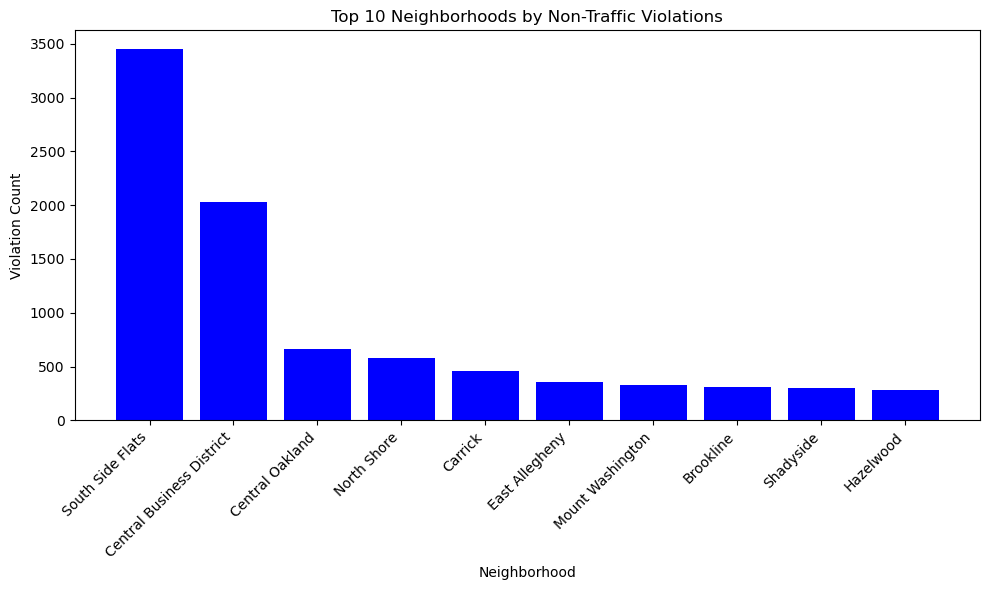

In [6]:
top_10 = violation_counts.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_10['Neighborhood'], top_10['Violation Count'], color='blue')
plt.title("Top 10 Neighborhoods by Non-Traffic Violations")
plt.xlabel("Neighborhood")
plt.ylabel("Violation Count")
plt.xticks(rotation=45, ha='right')  # Optional: improves label readability
plt.tight_layout()
plt.show()

- Southside Flats, Central Business Distric, and Central Oakland have the highest number of non-traffic violations

### ARRESTS DATA:

In [7]:
### IMPORT REQUIRED MODULES:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
### READ IN THE FILE:

df = pd.read_csv("arrest_data.csv")

In [9]:
### CLEAN DATA:

#Gets rid of any columns with blank data
df_clean = df[df['INCIDENTNEIGHBORHOOD'].notna()]
#Since we are looking at neighborhoods within the city, we will omit anything outside of the Greater Pittsburgh Region. 
df_clean = df_clean[df_clean['INCIDENTNEIGHBORHOOD'] != "Outside City"]
df_clean.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,6,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699


In [11]:
### BASIC ANALYSIS: 

arrest_counts = df_clean['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_counts.columns = ['Neighborhood', 'Arrest Count']

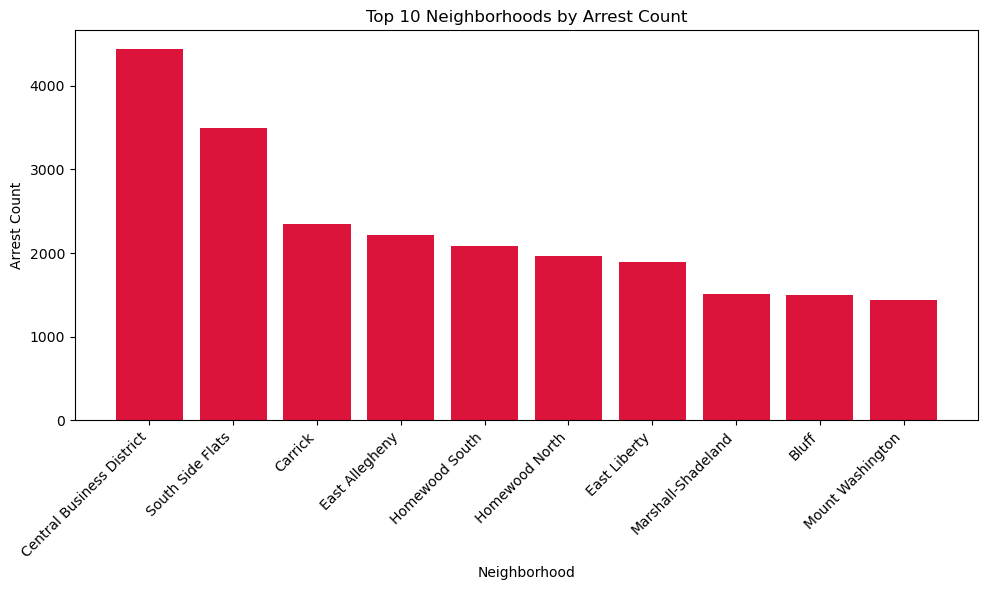

In [13]:
top_10 = arrest_counts.head(10)

# PLOT
plt.figure(figsize=(10,6))
plt.bar(top_10['Neighborhood'], top_10['Arrest Count'], color='crimson')
plt.title("Top 10 Neighborhoods by Arrest Count")
plt.xlabel("Neighborhood")
plt.ylabel("Arrest Count")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


- Observation: CENTRAL BUSINESS DISTRICT MOST ARRESTS

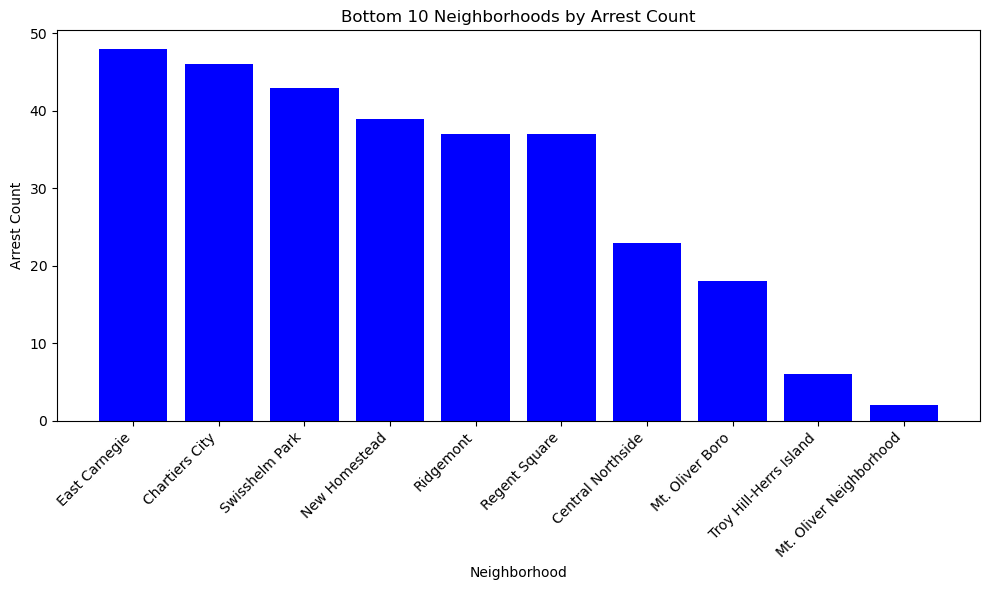

In [15]:
### LEAST ARRESTS:

least_10 = arrest_counts.tail(10)

# PLOT
plt.figure(figsize=(10,6))
plt.bar(least_10['Neighborhood'], least_10['Arrest Count'], color='blue')
plt.title("Bottom 10 Neighborhoods by Arrest Count")
plt.xlabel("Neighborhood")
plt.ylabel("Arrest Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- Observation: MT. OLIVER NEIGHBORHOOD LEAST ARRESTS

In [16]:
### ADVANCED ANALYSIS:

df_clean['OFFENSES'] = df_clean['OFFENSES'].fillna('').str.lower()
df_clean['OFFENSES'] = df_clean['OFFENSES'].str.lower()

In [17]:
# Assign severity to offenses (in consideration with the other offenses from the list)

def classify_severity(offense):
    if 'aggravated assault' in offense or 'strangulation' in offense or 'terroristic threats' in offense:
        return 5
    elif 'simple assault' in offense or 'bench warrant' in offense or 'failure to appear' in offense:
        return 4
    elif 'dui' in offense or 'retail theft' in offense or 'theft' in offense or 'receiving stolen property' in offense:
        return 3
    elif 'controlled substance' in offense or 'marijuana' in offense or 'paraphernalia' in offense or 'contempt' in offense:
        return 2
    else:
        return 1

df_clean['Severity'] = df_clean['OFFENSES'].apply(classify_severity)


In [18]:
# Find the average severity by neighborhood
severity_by_neighborhood = df_clean.groupby('INCIDENTNEIGHBORHOOD')['Severity'].mean().reset_index()
severity_by_neighborhood.columns = ['Neighborhood', 'Average Severity']

# Count arrests by neighborhood
arrest_counts = df_clean['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_counts.columns = ['Neighborhood', 'Arrest Count']

# Merge severity and arrest count data
combined_df = pd.merge(arrest_counts, severity_by_neighborhood, on='Neighborhood')

# Filter to Central Business District and Mt. Oliver
filtered_df_severity = combined_df[combined_df['Neighborhood'].isin(['Central Business District', 'Mt. Oliver Neighborhood'])]

filtered_df_severity

,Neighborhood,Arrest Count,Average Severity
0,Central Business District,4440,2.925
96,Mt. Oliver Neighborhood,2,2.500


- This data indicates that overall the average severity for both neighborhoods is very similar. However, we have to take into account the arrest count for both neighborhoods. The Central Business District has 4440 arrest counts with a 2.925 severity, meaning that there is a pretty decent split between severe and less severe offenses. Furthermore, since there are more cases in the Central Business District, we can rely more on the outputted value due to the larger smaple size. On the other hand, Mt. Oliver has 2 arrest counts with a severity of 2.500. This means that one case was more severe than the other, but since there are only 2 cases, this is a hard value to take into account. 

In [20]:
# Check which for incidents with a severity of 4 or more (more severe crimes)

severe_df = df_clean[df_clean['Severity'] >= 4]
severe_percent = severe_df.groupby('INCIDENTNEIGHBORHOOD').size() / df_clean.groupby('INCIDENTNEIGHBORHOOD').size()
severe_percent = severe_percent.dropna().sort_values(ascending=False)

filtered_neighborhoods = severe_percent.loc[
    ['Central Business District', 'Mt. Oliver Neighborhood']
]
print(filtered_neighborhoods)

# 42.6% of the arrests are over 4 severity for Central Business District
# 50.0% of the arrests are over 4 severity for Mt. Oliver Neighborhood

INCIDENTNEIGHBORHOOD
Central Business District    0.426577
Mt. Oliver Neighborhood      0.500000
dtype: float64


- Overall, Central Business District proves to be the least responsible when considering arrest data. On the other hand, the neighborhood of Mt. Oliver proves to be the most responsible (Will elaborate further below...)

### TAX DELINQUENCY DATA:

In [21]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
#Constructing new table
tax = pd.read_csv("taxDelinquency.tsv", sep="\t")

tax['total_delq_tax'] = tax['current_delq_tax'] + tax['prior_delq_tax'].replace(0, pd.NA)

avg = tax.groupby('neighborhood')['total_delq_tax'].mean()
total = tax.groupby('neighborhood')['total_delq_tax'].sum()
Ttotal = pd.concat([avg, total], axis=1).reset_index()
Ttotal.columns = ['neighborhood', 'avg_delq_tax', 'total_delq_tax']

Tcount = tax.groupby(['neighborhood', 'state_description']).size().unstack(fill_value=0).reset_index()
Tcount['total_cases'] = Tcount.drop(columns='neighborhood').sum(axis=1)

taxdelq = pd.merge(Ttotal, Tcount, on='neighborhood')

cols = ['neighborhood', 'avg_delq_tax', 'total_delq_tax'] + \
       [col for col in taxdelq.columns if col not in ['neighborhood', 'avg_delq_tax', 'total_delq_tax', 'total_cases']] + \
       ['total_cases']
taxdelq = taxdelq[cols]

Tcount = tax.groupby(['neighborhood', 'state_description']).size().unstack(fill_value=0).reset_index()
Tcount['total_cases'] = Tcount.drop(columns='neighborhood').sum(axis=1) #Has total cases of tax delq for each neighborhood 

taxdelq = tax.groupby(['neighborhood', 'state_description']).size().unstack(fill_value=0).reset_index() #combines into one table
taxdelq = pd.merge(Ttotal, Tcount, on='neighborhood')
taxdelq['total_delq_tax'] = taxdelq['avg_delq_tax'] * taxdelq['total_cases']

state_cols = Tcount.columns.difference(['neighborhood', 'total_cases']).tolist()
taxdelq = taxdelq[['neighborhood', 'avg_delq_tax', 'total_delq_tax'] + state_cols + ['total_cases']]

print(taxdelq.head(10))

        neighborhood avg_delq_tax  total_delq_tax  Commercial  Gov't Owned  \
0   Allegheny Center     54756.98       109513.96           1            1   
1     Allegheny West      4667.05       116676.25          10            0   
2          Allentown  2234.148648       710459.27          14            0   
3          Arlington  2619.353671   623406.173671           6            2   
4  Arlington Heights      6184.11        18552.33           0            0   
5         Banksville   2913.75043    273892.54043          14            0   
6  Bedford Dwellings   2199.40661       129764.99           4            1   
7          Beechview  2930.779867  1547451.769734          27            0   
8        Beltzhoover  2477.964105      1509080.14          12            2   
9         Bloomfield  4210.201097      1305162.34          61            0   

   Industrial  Other  Residential  Utilities  total_cases  
0           0      0            0          0            2  
1           0      0 

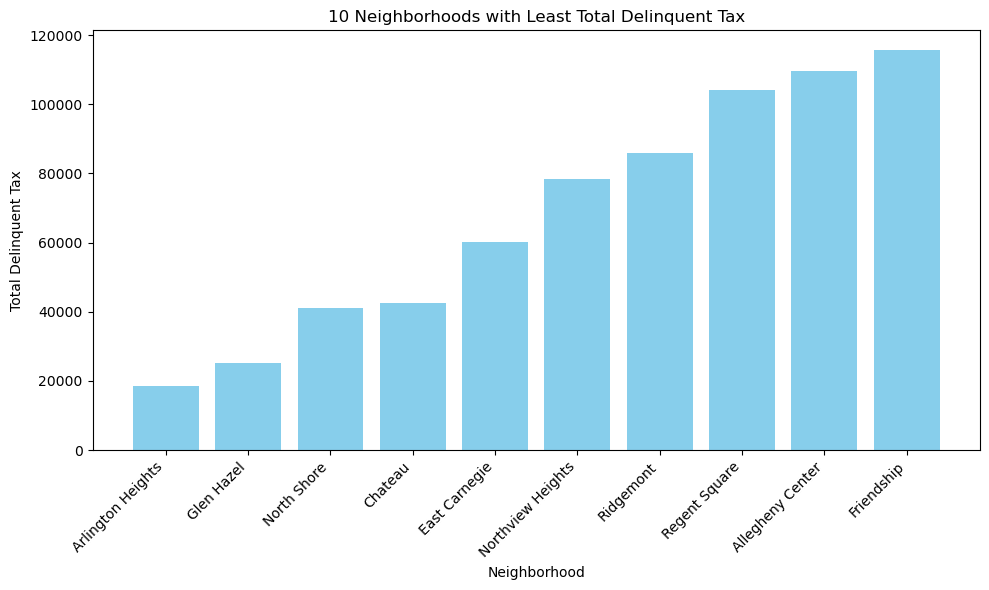

In [31]:
#Bar Graph Of total delq tax per neighborhood
bottomTotal = taxdelq.sort_values(by='total_delq_tax', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(bottomTotal['neighborhood'], bottomTotal['total_delq_tax'], color='skyblue')
plt.xlabel("Neighborhood")
plt.ylabel("Total Delinquent Tax")
plt.title("10 Neighborhoods with Least Total Delinquent Tax")
plt.xticks(rotation=45, ha='right')  # Helps with long neighborhood names
plt.tight_layout()
plt.show()


In [32]:
most = taxdelq.sort_values(by='total_delq_tax', ascending=True).tail(1)
print(most)

           neighborhood  avg_delq_tax  total_delq_tax  Commercial  \
77  Squirrel Hill South  10484.645711  4445489.781422          22   

    Gov't Owned  Industrial  Other  Residential  Utilities  total_cases  
77            0           0      0          402          0          424  


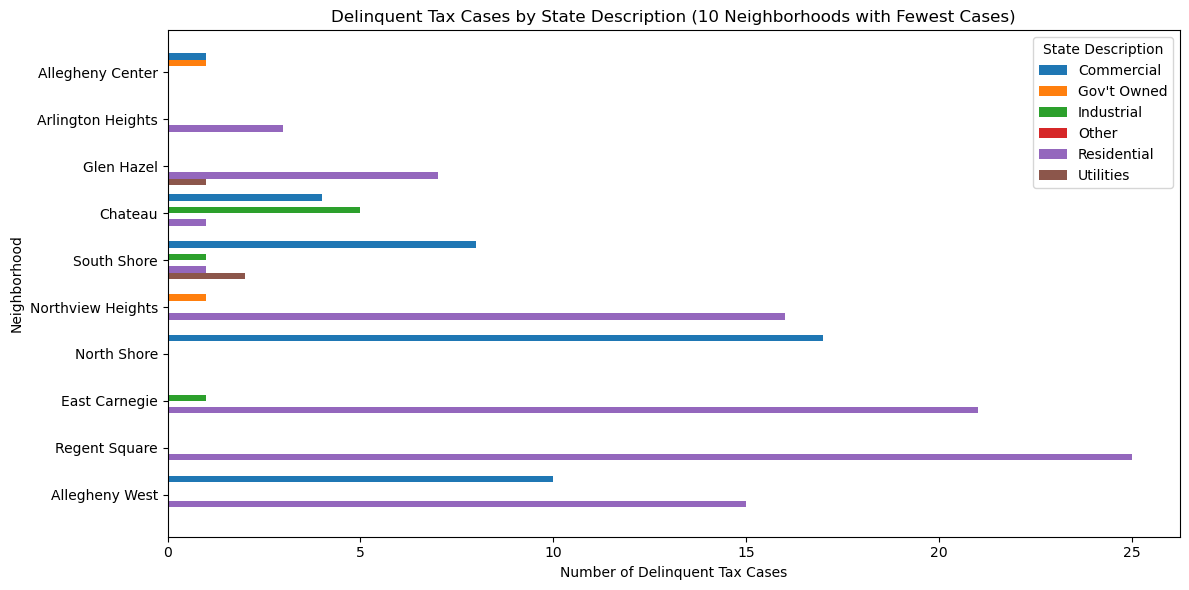

In [33]:
#Bar Graph of delq tax cases by neighborhood and description of tax. 
bottom10_cases = taxdelq.sort_values(by='total_cases', ascending=True).head(10)

neighborhoods = bottom10_cases['neighborhood'].tolist()
state_columns = [col for col in bottom10_cases.columns if col not in ['neighborhood', 'avg_delq_tax', 'total_delq_tax', 'total_cases']]

y = np.arange(len(neighborhoods))
bar_height = 0.8 / len(state_columns)
plt.figure(figsize=(12, 6))

for i, state in enumerate(state_columns):
    values = bottom10_cases[state].values
    plt.barh(y + i * bar_height, values, height=bar_height, label=state)

plt.yticks(y + bar_height * (len(state_columns) - 1) / 2, neighborhoods)
plt.xlabel("Number of Delinquent Tax Cases")
plt.ylabel("Neighborhood")
plt.title("Delinquent Tax Cases by State Description (10 Neighborhoods with Fewest Cases)")
plt.legend(title="State Description")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [19]:
avg_tax = taxdelq[taxdelq['neighborhood'] == 'Allegheny Center']['avg_delq_tax'].iloc[0]
print("Allegheny Center averages $" ,avg_tax, " per case")

avg_tax = taxdelq[taxdelq['neighborhood'] == 'Arlington Heights']['avg_delq_tax'].iloc[0]
print("Arlington Heights averages $" ,avg_tax, " per case")

Allegheny Center averages $ 54756.98  per case
Arlington Heights averages $ 6184.110000000001  per case


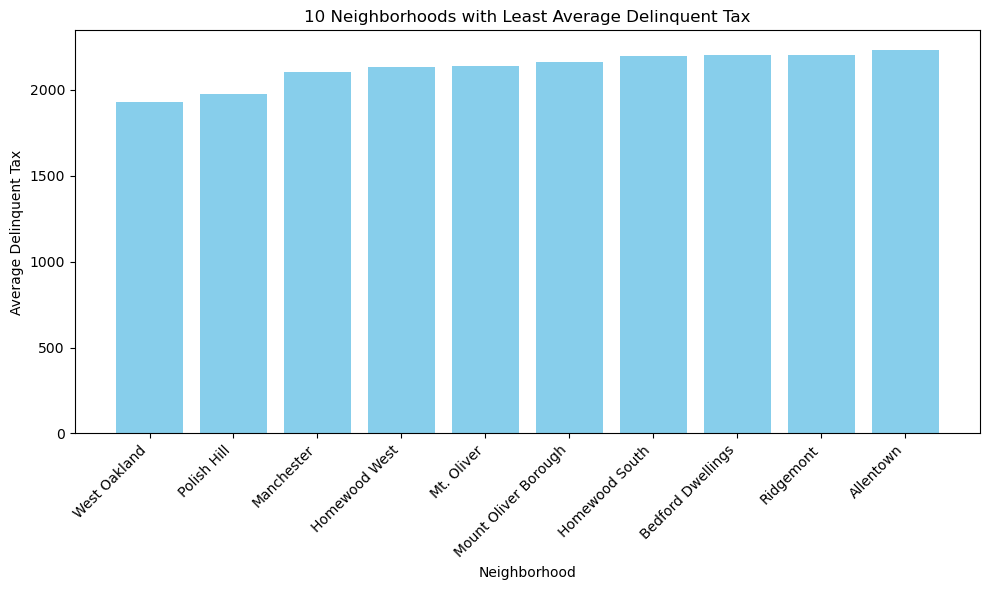

In [34]:
bottomAvg = taxdelq.sort_values(by='avg_delq_tax', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(bottomAvg['neighborhood'], bottomAvg['avg_delq_tax'], color='skyblue')
plt.xlabel("Neighborhood")
plt.ylabel("Average Delinquent Tax")
plt.title("10 Neighborhoods with Least Average Delinquent Tax")
plt.xticks(rotation=45, ha='right')  # Improves readability of neighborhood names
plt.tight_layout()
plt.show()


# **CONCLUSION**:

**Non-Traffic Violation** - Based on my analysis, Ridgemont proves to be the most responsible neighborhood when it comes to Non-Traffic Violations. On the other hand, the least responsible neighborhood when it comes to Non-Traffic Violations is South Side Flats. There is a drastic difference between both as Ridgemont has 4 non-traffic violations, whereas the South Side Flats has 3453 non-traffic violations. The differences can be attributed to population and significance to the city.

**Arrests** - After analyzing the arrest data, I concluded that the Central Business District is the least responsible neighborhood. On the other hand, Mt. Oliver is the most responsible neighborhood based on arrest data. The Central Business District totals 4400 arrests, while Mt. Oliver totals only 2 arrests! This vast difference can be attributed to the difference in population for both neighborhoods and civilian activity. However, after doing some post-analysis research, I found out that Mt.Oliver is not that safe a neighborhood. In fact, it is graded as a level D neighborhood. This indicates that the rate of crime is higher than that of the average US city. Furthermore, Mt.Oliver ranks in the 16th percentile for safety, meaning it is safer than 16% of cities but less safe than 84%. After obtaining this information, there are a few reasons why the dataset might not concur. I believe that there might be underreporting or limited police coverage or faulty jurisdiction, which could support my findings. 

**Tax Delinquency** - Based on my analysis, the neighborhood with the least amount of people with delinquent taxes is Arlington Heights. Ths neighborhood has the second least cases and the lowest total amount of delinquent tax. Based on this, we can assume that it is the most responsible when it comes to paying the bills. Notably, West Oakland owes the least amount of taxes per case. This indicates a neighborhood that can be deemed responsible. On the other hand, Squirrel Hill South proves to owe the most amount of taxes, making it one of the least responsible neighborhoods in the city. 

**OVERALL** - After analyzing data across non-traffic violations, arrests, and tax delinquencies, we found little to no overlap in which neighborhoods were deemed most or least responsible across the three domains. For example, Ridgemont stood out as the most responsible in terms of non-traffic violations, while Mt. Oliver appeared most responsible based on arrests, and Arlington Heights ranked highest in tax responsibility. Conversely, South Side Flats, the Central Business District, and Squirrel Hill South were among the least responsible in their respective categories. With some thought, we were able to find a pattern in regards to the least responsible neighborhoods. All of these neighborhoods rank amongst the most populated neighborhoods of Pittsburgh, which might suggest why they are deemed irresponsible. However, if we had to choose one neighborhood to be the most responsible, based on our analysis/data, we would have to pick Mt.Oliver as it appeared in the top 10 for each submetric. 

Overall, responsibility is not a one-dimensional trait—where one neighborhood may excel in one area, it might falter in another. This entire analysis highlights the challenges of working with public data and raises important questions about data accuracy, reporting practices, jurisdictional boundaries, and the background behind each dataset. To get a more complete and fair picture of neighborhood responsibility, further research is necessary. Incorporating additional data sources, such as demographic information, 911 call records, or school quality metrics, could provide more context. It would also help to consider differences in government enforcement and to normalize measures by population size.

Our findings show that while data can be informative, responsibility is a complex concept that cannot be reduced to just a few datasets or metrics..
